In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.nqubit, qtm.fubini_study, qtm.progress_bar
import importlib
importlib.reload(qtm.base)

<module 'qtm.base' from '..\\qtm\\base.py'>

### GHZ

In [15]:
num_qubits = 3
num_layers = 2
thetas = np.ones(num_qubits*num_layers*5)
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
loss_values = []
thetass = []
thetass, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_GHZchecker_linear, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_fubini_study,
    optimizer = qtm.base.sgd,
    verbose = 1,
    theta = theta,
    num_layers = num_layers,
    is_return_all_thetas = True
)

np.savetxt("../../experiments/linear_ansatz_ghz/" + str(num_qubits) + "/loss_values_sgd.csv", loss_values, delimiter=",")
np.savetxt("../../experiments/linear_ansatz_ghz/" + str(num_qubits) + "/thetass_sgd.csv", thetass, delimiter=",")


Step:  62%|██████▏   | 62/100 [22:36<15:27, 24.42s/it]

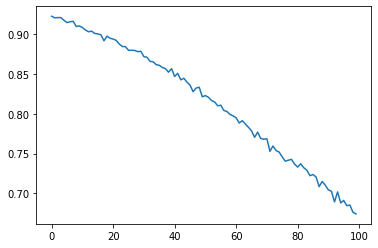

In [ ]:
plt.plot(loss_values)

In [ ]:
traces = []
fidelities = []
i = 0
for thetas in thetass:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_linear_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_ghz_state(qc1, theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../../experiments/linear_ansatz_ghz/" + str(num_qubits) + "/traces_sgd.csv", traces, delimiter=",")
np.savetxt("../../experiments/linear_ansatz_ghz/" + str(num_qubits) + "/fidelities_sgd.csv", fidelities, delimiter=",")

### W

In [ ]:
num_qubits = 3
num_layers = 2
thetas = np.ones(num_qubits*num_layers*5)
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
loss_values = []
thetass = []
thetass, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_Wchecker_linear, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_fubini_study,
    optimizer = qtm.base.sgd,
    verbose = 1,
    num_layers = num_layers,
    is_return_all_thetas = True
)

np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) + "/loss_values_sgd.csv", loss_values, delimiter=",")
np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) + "/thetass_sgd.csv", thetass, delimiter=",")


Step: 100%|██████████| 100/100 [27:45<00:00, 16.66s/it]


In [ ]:
traces = []
fidelities = []
i = 0
for thetas in thetass:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_linear_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_w_state(qc1)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) + "/traces_sgd.csv", traces, delimiter=",")
np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) + "/fidelities_sgd.csv", fidelities, delimiter=",")